In [110]:
import os
import json
import pandas as pd
import numpy as np
import re
import glob
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 30)

optimization="optimization"
run="run"
formula_id="formula_id"
formula_string="formula_string"
parsing_time="parsing_time"
rewrite_time="rewrite_time"
translation_time="translation_time"
execution_time="execution_time"
num_subplans="num_subplans"
metrics="metrics"

experiment_home= os.path.abspath('')
output_home= os.path.join(experiment_home, "output")

## Analyzing ICRISAT dataset

In [111]:
icrisat_output = os.path.join(output_home, "ICRISAT", "ICRISAT_formula.csv")
json_files = glob.glob(os.path.join(icrisat_output, "**", "*.json"), recursive=True)


data = []

for file in json_files:
    with open(file, "r") as f:
        content = json.load(f)
        for key, value in content.items():
            data.append({
                optimization: value[optimization],
                run: value[run],
                formula_id: value[formula_id],
                formula_string: value[formula_string],
                parsing_time: value[metrics][parsing_time],
                rewrite_time: value[metrics][rewrite_time],
                translation_time: value[metrics][translation_time],
                execution_time: value[metrics][execution_time],
                num_subplans: value[metrics][num_subplans],
            })

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df[df[formula_id] == 19]

,optimization,run,formula_id,formula_string,parsing_time,rewrite_time,translation_time,execution_time,num_subplans
18,subtree,1,19,"=LOOKUP(F1, E$1:E$14853, D$1:D$14853, 1)",86,8,26,3077144,1
48,subtree,3,19,"=LOOKUP(F1, E$1:E$14853, D$1:D$14853, 1)",95,8,29,3075422,1
78,subtree,2,19,"=LOOKUP(F1, E$1:E$14853, D$1:D$14853, 1)",95,10,25,3068480,1
108,function,1,19,"=LOOKUP(F1, E$1:E$14853, D$1:D$14853, 1)",91,7,24,3058435,1
138,function,3,19,"=LOOKUP(F1, E$1:E$14853, D$1:D$14853, 1)",102,9,29,3069785,1
168,function,2,19,"=LOOKUP(F1, E$1:E$14853, D$1:D$14853, 1)",99,8,25,3064612,1


In [112]:
df[[formula_id, formula_string]].drop_duplicates()

,formula_id,formula_string
0,1,=C1+D1
1,2,=C1+D2
2,3,=SUM(C1:D2)
3,4,=SUM($C$1:D1)
4,5,"=SUMIF(C1:D2, "">15"")"
5,6,"=SUMIF($C$1:D1, "">15"")"
6,7,=AVERAGE(C1:D2)
7,8,=AVERAGE($C$1:D1)
8,9,"=AVERAGEIF(C1:D2, "">15"")"
9,10,"=AVERAGEIF($C$1:D1, "">15"")"


## Comparing execution time and translation time

In [126]:
df_avg = df.groupby([formula_id, optimization], as_index=False)[execution_time].mean()
df_avg[[execution_time]] = df_avg[[execution_time]] / 1000
df_pivot = df_avg.pivot(index=formula_id, columns=optimization, values=execution_time)
df_pivot.reset_index(inplace=True)
df_pivot

optimization,formula_id,function,subtree
0,1,22.646667,24.868667
1,2,16.349667,15.511333
2,3,14.286333,14.029667
3,4,15.183000,14.016000
4,5,42.888000,16.678667
5,6,39.789667,14.624000
6,7,14.712333,14.118000
7,8,15.041667,15.381333
8,9,67.918000,17.021333
9,10,66.261000,15.858667


In [114]:
df_pivot[df_pivot[formula_id] == 19]

optimization,formula_id,function,subtree
18,19,13.986,14.302


<Figure size 1200x600 with 0 Axes>

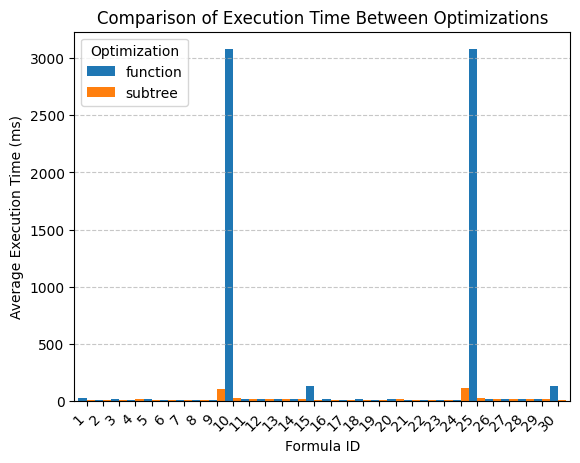

In [115]:
plt.figure(figsize=(12, 6))
df_pivot.plot(kind="bar", x=formula_id, stacked=False, width=1)

plt.ylabel("Average Execution Time (ms)")
plt.xlabel("Formula ID")
plt.title("Comparison of Execution Time Between Optimizations")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.legend(title="Optimization")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [116]:
df_avg = df.groupby([formula_id, optimization], as_index=False)[translation_time].mean()
df_avg[[translation_time]] = df_avg[[translation_time]] / 1000
df_pivot = df_avg.pivot(index=formula_id, columns=optimization, values=translation_time)
df_pivot.reset_index(inplace=True)
df_pivot

optimization,formula_id,function,subtree
0,1,0.120000,0.115000
1,2,0.041000,0.037000
2,3,0.027000,0.026333
3,4,0.024667,0.024000
4,5,0.203333,0.056333
5,6,0.160667,0.048333
6,7,0.024333,0.024000
7,8,0.021333,0.022333
8,9,0.290667,0.071000
9,10,0.279333,0.066000


<Figure size 1200x600 with 0 Axes>

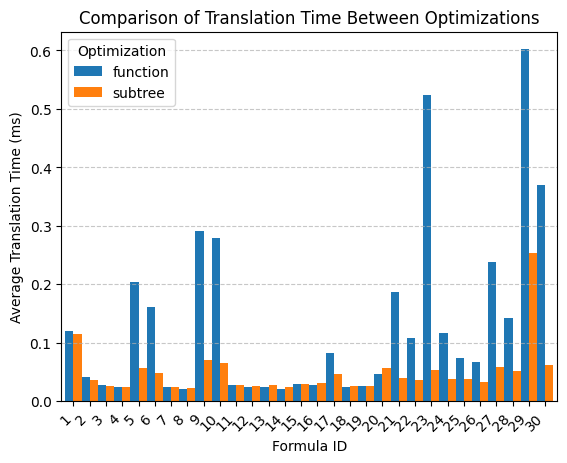

In [117]:
plt.figure(figsize=(12, 6))
df_pivot.plot(kind="bar", x=formula_id, stacked=False, width=1)

plt.ylabel("Average Translation Time (ms)")
plt.xlabel("Formula ID")
plt.title("Comparison of Translation Time Between Optimizations")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.legend(title="Optimization")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()